**1. Load Data**

In [34]:
import tensorflow as tf
import os
import cv2
import imghdr

In [35]:
#data is loaded from Google
data_dir = 'data'
image_exts = ['jpeg','jpg','bmp','png'] # Delete other type images
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [36]:
import numpy as np
from matplotlib import pyplot as plt

In [37]:
# Load data
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator() #transform tf.dataset into numpy.ndarray
batch = data_iterator.next()



Found 300 files belonging to 2 classes.


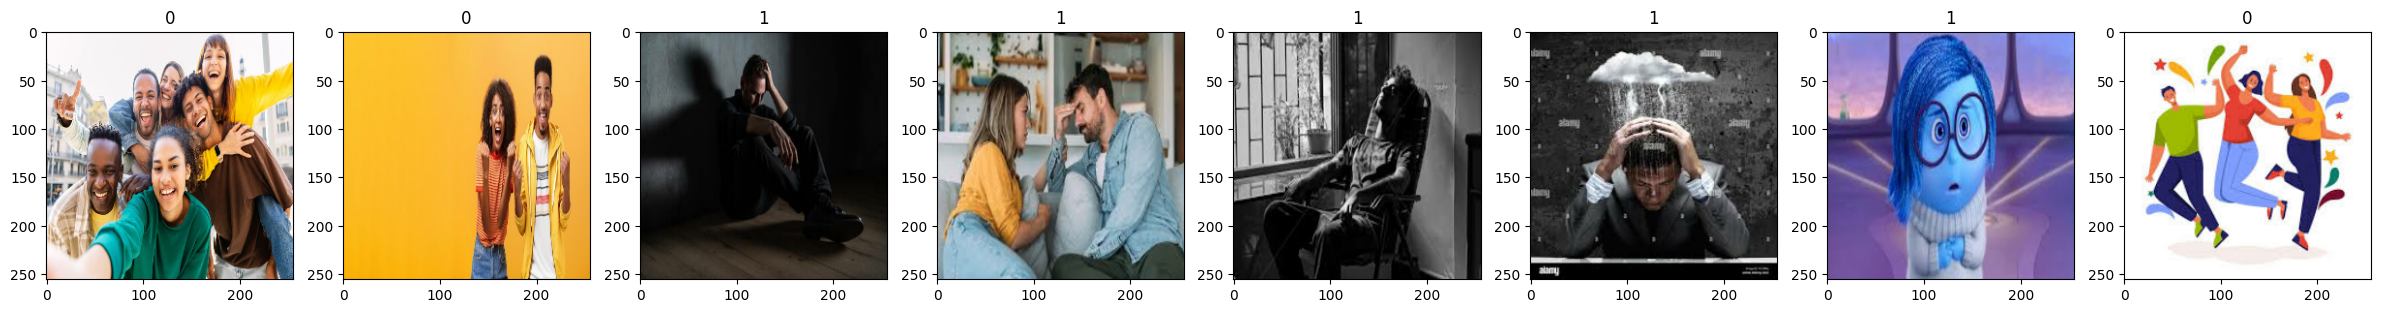

In [38]:
fig, ax = plt.subplots(ncols=8, figsize=(30,30))
for idx, img in enumerate(batch[0][:8]): # Lets see few images from data
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 0 - happy people
# 1 - sad people

**2. Preprocessing data**

In [39]:
# Scale the data
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[6.66666701e-02, 7.45098069e-02, 7.05882385e-02],
          [6.66666701e-02, 7.45098069e-02, 7.05882385e-02],
          [6.74479157e-02, 6.74479157e-02, 6.74479157e-02],
          ...,
          [5.88235296e-02, 5.49019612e-02, 4.70588244e-02],
          [6.47824779e-02, 6.08609058e-02, 5.30177690e-02],
          [6.99601695e-02, 6.60386011e-02, 5.16084544e-02]],
 
         [[6.66666701e-02, 7.45098069e-02, 7.05882385e-02],
          [6.66666701e-02, 7.45098069e-02, 7.05882385e-02],
          [6.74479157e-02, 6.74479157e-02, 6.74479157e-02],
          ...,
          [5.88235296e-02, 5.49019612e-02, 4.70588244e-02],
          [6.47824779e-02, 6.08609058e-02, 5.30177690e-02],
          [6.99601695e-02, 6.60386011e-02, 5.16084544e-02]],
 
         [[6.66666701e-02, 7.45098069e-02, 7.05882385e-02],
          [6.66666701e-02, 7.45098069e-02, 7.05882385e-02],
          [6.74479157e-02, 6.74479157e-02, 6.74479157e-02],
          ...,
          [5.88235296e-02, 5.49019612e-02, 4.7058

In [59]:
# Split data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [60]:
len(data) == train_size + val_size + test_size

True

In [61]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [43]:
print(train,val,test)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


**3. Neural Network**

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
# from tensorflow.keras.regularizers import l2

In [69]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

# model.add(Conv2D(32, (3,3), 1, activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())

# model.add(Conv2D(64, (3,3), 1, activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [71]:
from tensorflow.keras.optimizers import SGD
optimizer = SGD(learning_rate=0.1)
model.compile('SGD', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 254, 254, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 258064)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │     8,258,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,258,625 (31.50 MB)

 Trainable params: 8,258,593 (31.50 MB)

 Non-trainable params: 32 (128.00 B)

**4. Train**

In [73]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.6386 - loss: 2.8483 - val_accuracy: 0.3594 - val_loss: 2.4657
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.6721 - loss: 3.0931 - val_accuracy: 0.7500 - val_loss: 0.6033
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.8459 - loss: 0.4990 - val_accuracy: 0.8594 - val_loss: 0.5217
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.9136 - loss: 0.2740 - val_accuracy: 0.7344 - val_loss: 0.4873
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.8883 - loss: 0.3813 - val_accuracy: 0.7969 - val_loss: 0.5226
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.9123 - loss: 0.2636 - val_accuracy: 0.7656 - val_loss: 0.5323
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.9142 - loss: 0.1929 - val_accuracy: 0.7344 - val_loss: 0.5541
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.9528 - loss: 0.1549 - val_accuracy: 0.6719 - val_loss:

In [74]:
hist.history

{'accuracy': [0.6428571343421936,
  0.6964285969734192,
  0.8705357313156128,
  0.8883928656578064,
  0.8973214030265808,
  0.9017857313156128,
  0.9241071343421936,
  0.9419642686843872,
  0.9553571343421936,
  0.9642857313156128,
  0.96875,
  0.9732142686843872,
  0.9955357313156128,
  0.9732142686843872,
  0.9732142686843872,
  0.9866071343421936,
  0.9910714030265808,
  0.9732142686843872,
  1.0,
  0.9910714030265808],
 'loss': [3.282236337661743,
  2.2428817749023438,
  0.4607180058956146,
  0.4235208034515381,
  0.275938481092453,
  0.28400948643684387,
  0.1732417792081833,
  0.21939989924430847,
  0.1794661283493042,
  0.09792415052652359,
  0.08370319753885269,
  0.06267626583576202,
  0.046803779900074005,
  0.08836094290018082,
  0.08910699933767319,
  0.05082905292510986,
  0.045855164527893066,
  0.06047319620847702,
  0.025540221482515335,
  0.024620359763503075],
 'val_accuracy': [0.359375,
  0.75,
  0.859375,
  0.734375,
  0.796875,
  0.765625,
  0.734375,
  0.671875,
 

**5. Plot Perfomance**

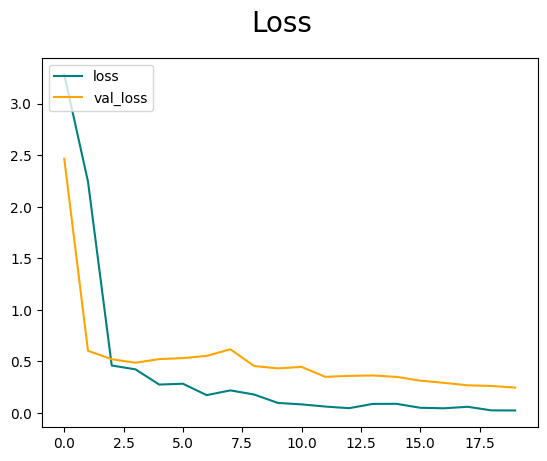

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show() # We have good result!

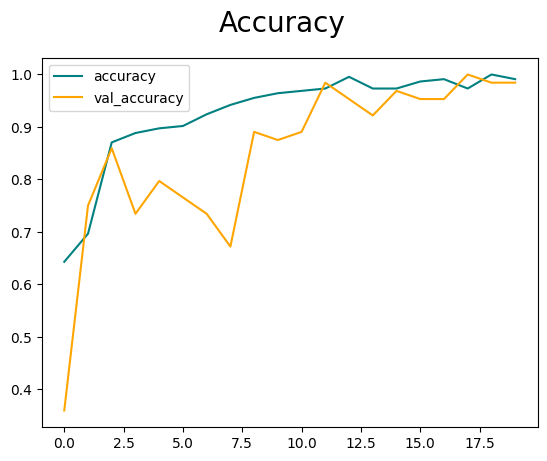

In [77]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show() # Also not bad result

**6. Evaluate Model**

In [78]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [79]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [80]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [81]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


**7.Test the Model**

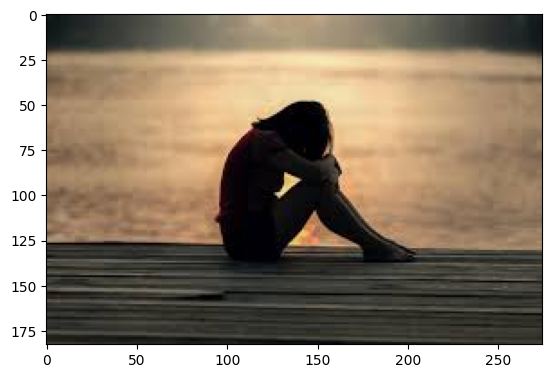

In [88]:
img = cv2.imread('sad_test.jpg') # Let's test random image from google
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

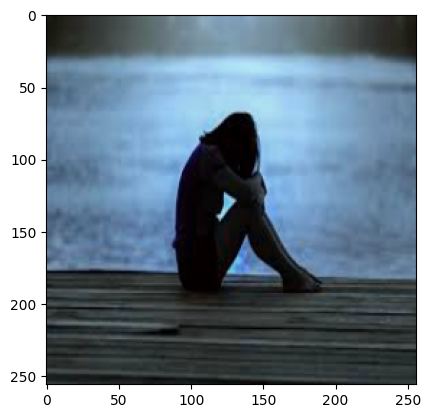

In [89]:
resize = tf.image.resize(img,(256,256)) #reshape image 
plt.imshow(resize.numpy().astype(int))
plt.show()

In [90]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.79195225]], dtype=float32)

In [91]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


**8. Save The Model**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','happysadmodel.h5'))


In [ ]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class is Sad
